[*********************100%***********************]  1 of 1 completed


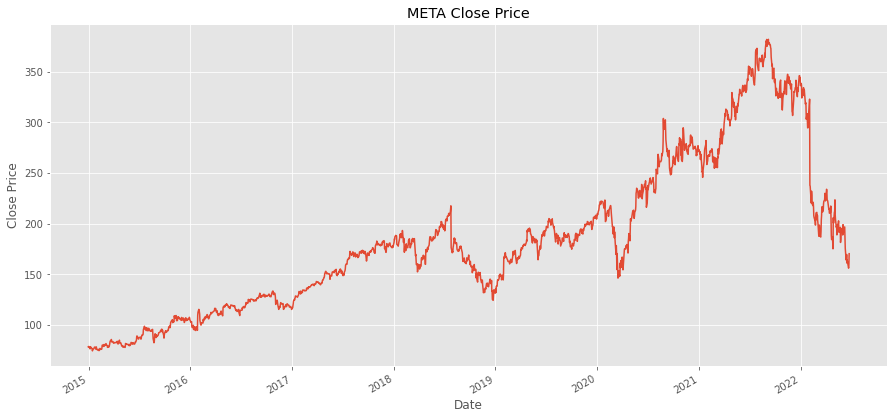

In [4]:
import pandas as pd
import numpy as np
import yfinance as yf

# Import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
#%matplotlib inline

# Fetch the stock data
company = 'META'
data = yf.download(company, '2015-01-01')

# Visualise the data
data['Close'].plot(figsize=(15,7))
plt.ylabel('Close Price')
plt.title(company + ' Close Price')
plt.show()

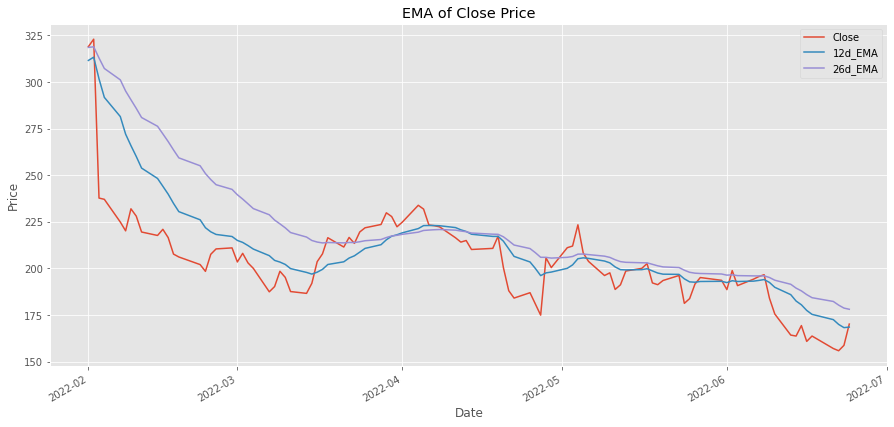

In [5]:
# Calculate exponential moving average
data['12d_EMA'] = data.Close.ewm(span=12, adjust=False).mean()
data['26d_EMA'] = data.Close.ewm(span=26, adjust=False).mean()

# Plot Close Price and EMA
data[['Close', '12d_EMA', '26d_EMA']][-100:].plot(figsize=(15, 7))
plt.ylabel('Price')
plt.title('EMA of Close Price')
plt.show()

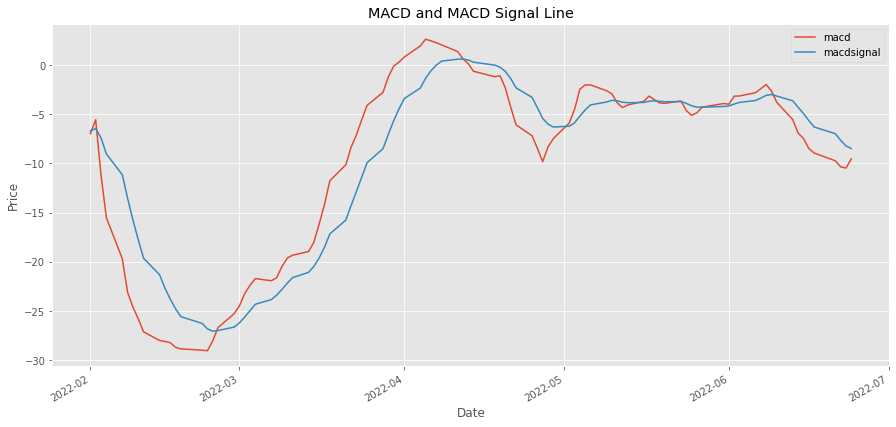

In [6]:
# Calculate MACD line
data['macd'] = data['12d_EMA']- data['26d_EMA']

# Calculate MACD Signal line
data['macdsignal'] = data.macd.ewm(span=9, adjust=False).mean()

# Plot MACD and MACD Signal line
data[['macd','macdsignal']][-100:].plot(figsize=(15,7))
plt.ylabel('Price')
plt.title('MACD and MACD Signal Line')
plt.show()

In [7]:
# Column to store trading signals
data['trading_signal'] = np.nan

# Buy signals
data.loc[data['macd'] > data['macdsignal'], 'trading_signal'] = 1

# Sell signals
data.loc[data['macd'] < data['macdsignal'], 'trading_signal'] = -1

# Fill the missing values with last valid observation
data = data.fillna(method = 'ffill')

data.tail()

,Open,High,Low,Close,Adj Close,Volume,12d_EMA,26d_EMA,macd,macdsignal,trading_signal
Date,,,,,,,,,,,
2022-06-17,161.679993,165.899994,159.899994,163.740005,163.740005,31295300,175.369405,184.314167,-8.944762,-6.302186,-1.0
2022-06-21,165.929993,167.759995,155.970001,157.050003,157.050003,50724900,172.551036,182.294599,-9.743564,-6.990462,-1.0
2022-06-22,158.380005,160.789993,155.440002,155.850006,155.850006,47267800,169.981646,180.335741,-10.354094,-7.663188,-1.0
2022-06-23,156.270004,159.750000,154.250000,158.750000,158.750000,40499200,168.253701,178.736797,-10.483096,-8.227170,-1.0
2022-06-24,161.729996,170.250000,161.300003,170.160004,170.160004,61991200,168.546978,178.101479,-9.554501,-8.492636,-1.0


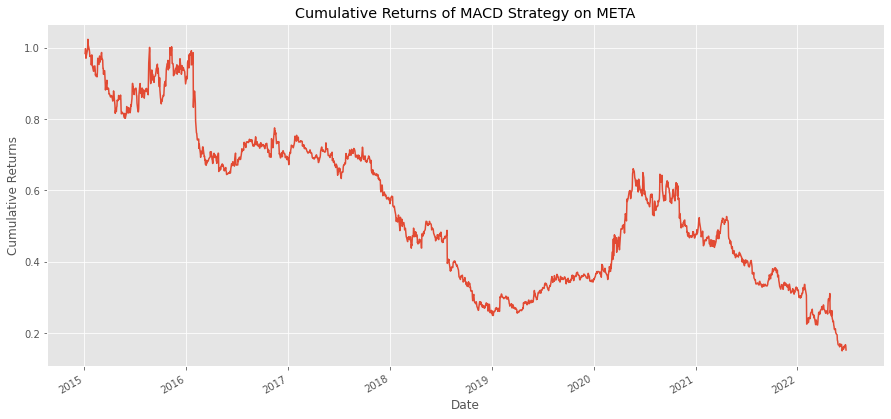

In [8]:
# Calculate daily returns of Apple
data['returns'] = data.Close.pct_change()

# Calculate daily strategy returns
data['strategy_returns'] = data.returns * data.trading_signal.shift(1)

# Calculate cumulative strategy returns
cumulative_strategy_returns = (data.strategy_returns + 1).cumprod()

# Plot cumulative strategy returns
cumulative_strategy_returns.plot(figsize=(15,7))
plt.ylabel('Cumulative Returns')
plt.title('Cumulative Returns of MACD Strategy on ' + company)
plt.show()

In [9]:
# Total number of trading days
days = len(cumulative_strategy_returns)

# Calculate compounded annual growth rate
annual_returns = (cumulative_strategy_returns.iloc[-1]**(252/days) - 1)*100

print('The CAGR is %.2f%%' % annual_returns)

The CAGR is -22.21%


In [10]:
# Calculate the annualised volatility
annual_volatility = data.strategy_returns.std() * np.sqrt(252) * 100

print('The annualised volatility is %.2f%%' % annual_volatility)

The annualised volatility is 35.00%


In [11]:
# Assume the annual risk-free rate is 2%
risk_free_rate = 0.02
daily_risk_free_return = risk_free_rate/252

# Calculate the excess returns by subtracting the daily returns by daily risk-free return
excess_daily_returns = data.strategy_returns - daily_risk_free_return

# Calculate the sharpe ratio using the given formula
sharpe_ratio = (excess_daily_returns.mean() /
                excess_daily_returns.std()) * np.sqrt(252)

print('The Sharpe ratio is %.2f' % sharpe_ratio)


The Sharpe ratio is -0.60
